In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

samplelist_small = ["Control_merge",
              "Rad21KD_merge",
              "NIPBLKD_merge",
              "NIPBL_Rad21_KD",
              "Mau2KD",
              "CTCFKD_merge",
             "ESCO1KD_merge",
             "WAPLKD",
             "PDS5AKD_72h",
             "PDS5BKD",
             "PDS5ABKD",
              "JQ1_plus"]

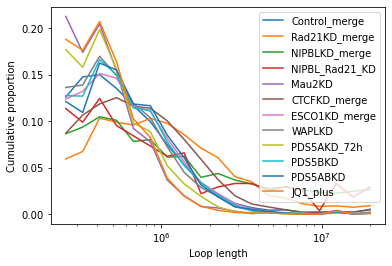

In [2]:
for sample in samplelist_small:
    d = pd.read_csv("../../Loop/" + sample + "/VC_SQRT/merged_loops.simple.bedpe", sep="\t", header=None)
    a = d[4] - d[2]
    hist, bins = np.histogram(a, bins=np.logspace(start=np.log10(200000), stop=np.log10(20000000), num=20))
    plt.plot(bins[1:], hist/hist.sum(),label=sample)

plt.xlabel("Loop length")
plt.ylabel("Cumulative proportion")
plt.xscale('log')
plt.legend()

#plt.savefig("looplength.cumulativeplot.pdf")

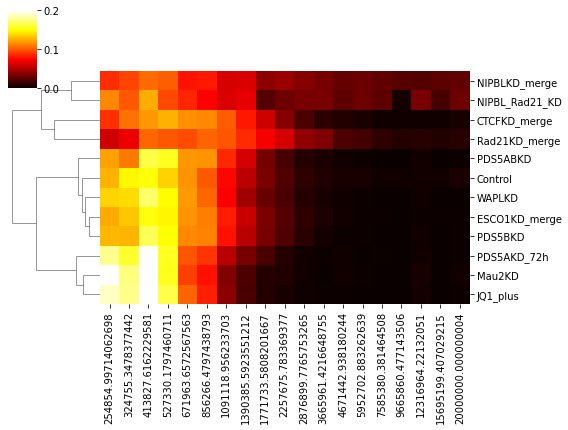

In [3]:
def gethist(sample, label):
    d = pd.read_csv("../../Loop/" + sample + "/VC_SQRT/merged_loops.simple.bedpe", sep="\t", header=None)
    a = d[4] - d[2]
    hist, bins = np.histogram(a, bins=np.logspace(start=np.log10(200000), stop=np.log10(20000000), num=20))
    df = pd.DataFrame(data=hist/hist.sum(), index=bins[1:], columns=[label])
    return df

df = gethist("Control_merge", "Control")
for sample in ["CTCFKD_merge",
               "Rad21KD_merge",
               "NIPBLKD_merge",
               "NIPBL_Rad21_KD",
               "ESCO1KD_merge",
               "Mau2KD",
               "WAPLKD",
               "PDS5AKD_72h",
               "PDS5BKD",
              "PDS5ABKD",
              "JQ1_plus"]:
    m = gethist(sample, sample)
    df = pd.concat([df, m], axis=1)
    
sns.clustermap(df.T, cmap="hot", vmax=0.2, col_cluster=False, row_cluster=True, figsize=(8, 6))
plt.savefig("looplength.heatmap.pdf")